<a href="https://colab.research.google.com/github/ArthurDOli/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e Carregamento de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Análise dos dados originais

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Distribuição do Preço de Venda')

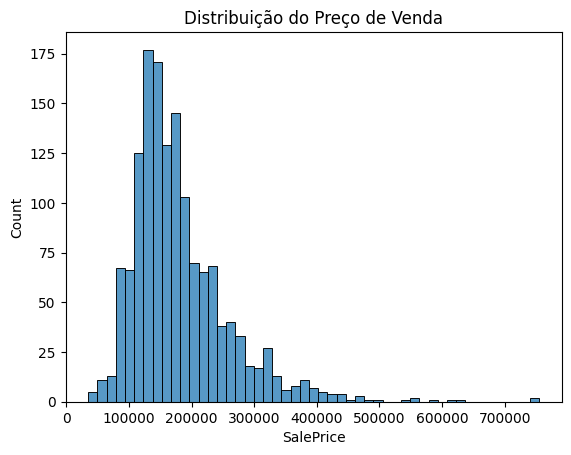

In [ ]:
sns.histplot(df_train['SalePrice'])
plt.title('Distribuição do Preço de Venda')

# Modificação dos dados

In [ ]:
# Separação dos dados e remoção das colunas desnecessárias

X = df_train.drop(['SalePrice', 'PoolQC', 'MiscFeature', 'Fence', 'Alley'], axis=1)
y = df_train['SalePrice']

from sklearn.model_selection import train_test_split

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Pegar todas as colunas com dtype = 'object'
colunas_categoricas_nominais = ['MSZoning', 'LandContour', 'Street', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
colunas_categoricas_ordinais = ['LotShape', 'OverallCond', 'OverallQual', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']

# Pegar todas as colunas com dtype = 'int64' e 'float64'
colunas_numericas = X.select_dtypes(include=['int64', 'float64'])
colunas_numericas = colunas_numericas.drop(['Id', 'OverallQual', 'OverallCond'], axis=1)
lista_colunas_numericas = colunas_numericas.columns.tolist()

## Criação da Pipeline

In [ ]:
from sklearn_pandas.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

## Separação dos valores ordinais

In [ ]:
lotshape_order = ['Reg', 'IR1', 'IR2', 'IR3']
overallcond_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
overallqual_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
landslope_order = ['Gtl', 'Mod', 'Sev']
exterqual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
extercond_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmtqual_order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmtcond_order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmtexposure_order = ['NA', 'No', 'Mn', 'Av', 'Gd']
bsmtfintype1_order = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfintype2_order = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heatingqc_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
kitchenqual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
fireplacequ_order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garagefinish_order = ['NA', 'Unf', 'RFn', 'Fin']
garagequal_order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garagecond_order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

lista_de_ordens = [lotshape_order, overallcond_order, overallqual_order, landslope_order, exterqual_order, extercond_order, bsmtqual_order, bsmtcond_order, bsmtexposure_order, bsmtfintype1_order, bsmtfintype2_order,
                   heatingqc_order, kitchenqual_order, fireplacequ_order, garagefinish_order, garagequal_order, garagecond_order]

## Pipeline

In [ ]:
print("Número de colunas ordinais:", len(colunas_categoricas_ordinais))
print("Número de listas de ordem fornecidas:", len(lista_de_ordens))
print(colunas_categoricas_ordinais)
print(lista_de_ordens)

Número de colunas ordinais: 17
Número de listas de ordem fornecidas: 17
['LotShape', 'OverallCond', 'OverallQual', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']
[['Reg', 'IR1', 'IR2', 'IR3'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Gtl', 'Mod', 'Sev'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'No', 'Mn', 'Av', 'Gd'], ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'Unf', 'RFn', 'Fin'], ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]


In [ ]:
pipeline_numerica = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_categorica_nominal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

pipeline_categorica_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    # O 'use_encoded_value' faz com que não ocorra um erro quando um valor novo aparecer durante a execução
    # dos X_valid, e esse valor será substituido pelo unknown_value, que é '-1'
    ('ordinal', OrdinalEncoder(categories=lista_de_ordens, handle_unknown='use_encoded_value', unknown_value=-1))
])

pre_processador = ColumnTransformer(
    transformers=[
        ('num', pipeline_numerica, lista_colunas_numericas),
        ('cat_nom', pipeline_categorica_nominal, colunas_categoricas_nominais),
        ('cat_ord', pipeline_categorica_ordinal, colunas_categoricas_ordinais)
    ]
)

X_treino_processado = pre_processador.fit_transform(X_treino)

print("Shape dos dados processados:", X_treino_processado.shape)
# Veja as primeiras linhas (será um array NumPy denso ou esparso)
print("Primeiras 5 linhas processadas:\n", X_treino_processado[:5])

# pipeline_completa = Pipeline(steps=[
#     ('preprocessor', pre_processador),
#     ('classifier', )
# ])

Shape dos dados processados: (1168, 221)
Primeiras 5 linhas processadas:
 [[-0.8667643  -0.01246836 -0.21289571 ...  2.          3.
   3.        ]
 [ 0.07410996 -0.50235683 -0.26524463 ...  2.          3.
   3.        ]
 [-0.63154574 -0.14607431 -0.17784146 ...  0.          0.
   0.        ]
 [-0.16110861 -0.45782152 -0.32447422 ...  1.          3.
   3.        ]
 [-0.16110861 -0.90317467 -0.52903482 ...  1.          3.
   3.        ]]


# x

In [ ]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


Text(0.5, 1.0, 'Distribuição do Preço de Venda (Log)')

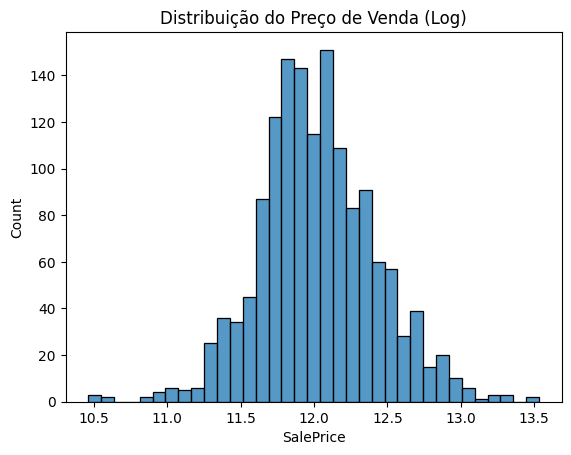

In [ ]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.histplot(df_train['SalePrice'])
plt.title('Distribuição do Preço de Venda (Log)')